# Exploratory Data Analysis Project :US Accident Data

This analysis is build by referring to EDA Project by Jovian Course

#### Steps to follow
 1. Select dataset from Kaggle
 2. Performance data preparation & Cleaning using Panda
 3. Performance exploratory analysis & visualization using Matplotlib & Seaborn
 4. Ask & answer questions about the data 
 5. Summarise your interfaces & write a conclusion
 6. Document , publish and present your Jupyter notebook online

### Data  : USA Accidents Exploratory Data Analysis

### Task 1 : Data Prepartion & Cleaning

In [1]:
## Import Library 
import pandas as pd # pandas
import numpy as np
import matplotlib as mpl # matplot
import matplotlib.pyplot as plt # matplot ploting layer
import seaborn as sns # seaborn
sns.set_style("darkgrid") # graph plot
from wordcloud import WordCloud as wdc

In [2]:
# import data
# data source : 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

data = pd.read_csv("../Learning/Kaggle_Data/US_Accidents_Dec20_Updated.csv") 

In [3]:
#Method to download data from kaggle using cade
# pip install opendatasets --upgrade --quiet
# import opendatasets as od

# download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'

# od.download(download_url)

# data = pd.read_csv("./us-accidents/US_Accidents_Dec20_Updated.csv")

In [4]:
#data view top 5 rows
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,2,2019-05-21 08:29:55,2019-05-21 09:29:40,34.808868,-82.269157,34.808868,-82.269157,0.0,Accident on Tanner Rd at Pennbrooke Ln.,...,False,False,False,False,False,False,Day,Day,Day,Day
1,A-2,2,2019-10-07 17:43:09,2019-10-07 19:42:50,35.090080,-80.745560,35.090080,-80.745560,0.0,Accident on Houston Branch Rd at Providence Br...,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-3,2,2020-12-13 21:53:00,2020-12-13 22:44:00,37.145730,-121.985052,37.165850,-121.988062,1.4,Stationary traffic on CA-17 from Summit Rd (CA...,...,False,False,False,False,False,False,Night,Night,Night,Night
3,A-4,2,2018-04-17 16:51:23,2018-04-17 17:50:46,39.110390,-119.773781,39.110390,-119.773781,0.0,Accident on US-395 Southbound at Topsy Ln.,...,False,False,False,False,True,False,Day,Day,Day,Day
4,A-5,3,2016-08-31 17:40:49,2016-08-31 18:10:49,26.102942,-80.265091,26.102942,-80.265091,0.0,Accident on I-595 Westbound at Exit 4 / Pine I...,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
#column names
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

### Data Column Explanation

* ID: This is a unique identifier of the accident record.
* Source: Indicates source of the accident report (i.e. the API which reported the accident.).
* TMC: A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.
* Severity: Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
* Start_Time: Shows start time of the accident in local time zone.
* End_Time: Shows end time of the accident in local time zone.
* Start_Lat: Shows latitude in GPS coordinate of the start point.
* Start_Lng: Shows longitude in GPS coordinate of the start point.
* End_Lat: Shows latitude in GPS coordinate of the end point.
* End_Lng: Shows longitude in GPS coordinate of the end point.
* Distance(mi): The length of the road extent affected by the accident.
* Description: Shows natural language description of the accident.


* Number: Shows the street number in address field.
* Street: Shows the street name in address field.
* Side: Shows the relative side of the street (Right/Left) in address field.
* City: Shows the city in address field.
* County: Shows the county in address field.
* State: Shows the state in address field.
* Zipcode: Shows the zipcode in address field.
* Country: Shows the country in address field.
* Timezone: Shows timezone based on the location of the accident (eastern, central, etc.).


* Airport_Code: Denotes an airport-based weather station which is the closest one to location of the accident.
* Weather_Timestamp: Shows the time-stamp of weather observation record (in local time).
* Temperature(F): Shows the temperature (in Fahrenheit).
* Wind_Chill(F): Shows the wind chill (in Fahrenheit).=
* Humidity(%): Shows the humidity (in percentage).
* Pressure(in): Shows the air pressure (in inches).
* Visibility(mi): Shows visibility (in miles).
* Wind_Direction: Shows wind direction.
* Wind_Speed(mph): Shows wind speed (in miles per hour).
* Precipitation(in): Shows precipitation amount in inches, if there is any.
* Weather_Condition: Shows the weather condition (rain, snow, thunderstorm, fog, etc.).


* Amenity: A Point-Of-Interest (POI) annotation which indicates presence of amenity in a nearby location.
* Bump: A POI annotation which indicates presence of speed bump or hump in a nearby location.
* Crossing: A POI annotation which indicates presence of crossing in a nearby location.
* Give_Way: A POI annotation which indicates presence of give_way sign in a nearby location.
* Junction: A POI annotation which indicates presence of junction in a nearby location.
* No_Exit: A POI annotation which indicates presence of no_exit sign in a nearby location.
* Railway: A POI annotation which indicates presence of railway in a nearby location.
* Roundabout: A POI annotation which indicates presence of roundabout in a nearby location.
* Station: A POI annotation which indicates presence of station (bus, train, etc.) in a* nearby location.
* Stop: A POI annotation which indicates presence of stop sign in a nearby location.
* Traffic_Calming: A POI annotation which indicates presence of traffic_calming means in a nearby location.
* Traffic_Signal: A POI annotation which indicates presence of traffic_signal in a nearby location.
* Turning_Loop: A POI annotation which indicates presence of turning_loop in a nearby location.


* Sunrise_Sunset: Shows the period of day (i.e. day or night) based on sunrise/sunset.
* Civil_Twilight: Shows the period of day (i.e. day or night) based on civil twilight.
* Nautical_Twilight: Shows the period of day (i.e. day or night) based on nautical twilight.
* Astronomical_Twilight: Shows the period of day (i.e. day or night) based on astronomical twilight.


In [6]:
#info about data column length
len(data.columns)

47

In [7]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906610 entries, 0 to 2906609
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [8]:
# summary statics for numberic value
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.906610e+06,2.906610e+06,2.906610e+06,2.623789e+06,2.623789e+06,2.906610e+06,1.014938e+06,2.839386e+06,1.722751e+06,2.835340e+06,2.849702e+06,2.834532e+06,2.599447e+06,1.605284e+06
mean,2.288649e+00,3.653027e+01,-9.642676e+01,3.651733e+01,-9.620367e+01,3.980541e-01,6.789728e+03,6.098873e+01,5.499048e+01,6.537758e+01,2.965685e+01,9.116766e+00,7.818111e+00,1.119459e-02
std,5.541618e-01,5.013964e+00,1.775412e+01,5.016609e+00,1.765971e+01,1.592556e+00,1.697225e+04,1.845258e+01,2.219542e+01,2.287854e+01,9.094133e-01,2.837271e+00,5.431171e+00,1.540812e-01
min,1.000000e+00,2.455527e+01,-1.246238e+02,2.455527e+01,-1.246238e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.366453e+01,-1.178232e+02,3.364659e+01,-1.177020e+02,0.000000e+00,9.650000e+02,4.890000e+01,3.900000e+01,4.900000e+01,2.959000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.609977e+01,-9.116690e+01,3.605898e+01,-9.105163e+01,0.000000e+00,3.093000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.992000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.037505e+01,-8.085814e+01,4.033133e+01,-8.084679e+01,2.790000e-01,7.976000e+03,7.500000e+01,7.200000e+01,8.500000e+01,3.007000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,3.336300e+02,9.999997e+06,2.030000e+02,1.740000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [9]:
# no of numeric column
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = data.select_dtypes(include=numerics)
len(numeric_df.columns)

14

In [10]:
# COUNT missing value per column
data.isna().sum().sort_values(ascending=False)

Number                   1891672
Precipitation(in)        1301326
Wind_Chill(F)            1183859
Wind_Speed(mph)           307163
End_Lat                   282821
End_Lng                   282821
Visibility(mi)             72078
Weather_Condition          71851
Humidity(%)                71270
Temperature(F)             67224
Wind_Direction             63474
Pressure(in)               56908
Weather_Timestamp          46917
Airport_Code                6608
Timezone                    3430
Zipcode                     1114
Nautical_Twilight            110
Astronomical_Twilight        110
Civil_Twilight               110
Sunrise_Sunset               110
City                         108
Amenity                        0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
Description                    0
Turning_Loop                   0
Street    

In [11]:
# Percentage of missing values

missing_per=data.isna().sum().sort_values(ascending=False)
missing_per/len(data)

Number                   0.650817
Precipitation(in)        0.447713
Wind_Chill(F)            0.407299
Wind_Speed(mph)          0.105677
End_Lat                  0.097303
End_Lng                  0.097303
Visibility(mi)           0.024798
Weather_Condition        0.024720
Humidity(%)              0.024520
Temperature(F)           0.023128
Wind_Direction           0.021838
Pressure(in)             0.019579
Weather_Timestamp        0.016141
Airport_Code             0.002273
Timezone                 0.001180
Zipcode                  0.000383
Nautical_Twilight        0.000038
Astronomical_Twilight    0.000038
Civil_Twilight           0.000038
Sunrise_Sunset           0.000038
City                     0.000037
Amenity                  0.000000
Severity                 0.000000
Start_Time               0.000000
End_Time                 0.000000
Start_Lat                0.000000
Start_Lng                0.000000
Distance(mi)             0.000000
Description              0.000000
Turning_Loop  

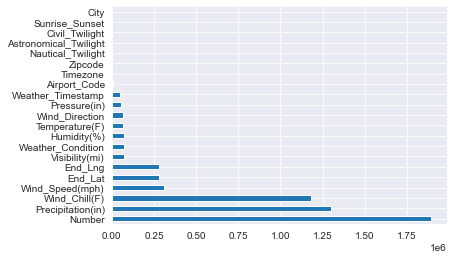

In [12]:
# Bar chart missing column removed (where missing is zero)
missing_per[missing_per != 0].plot(kind="barh")


In [13]:
#drop column with more than 50% data missing
data.drop(columns=['Number'],inplace=True)

#### Task 2 :  Exploratory analysis & visulization 

Variable of interest
* Severity 
* Start Time
* Start Lat & Start Lng
* Distance(mi)
* Description
* City /Country /State
* Zipcode
* Temperature
* Pressure
13. Visibility
14. Windspeed
15. Bump
16. Crossing
17. Give_way
18. Traffic_Signal
19. Weather condition

### Univariate Analysis

#### 1. Severity

In [14]:
# Severity Value Counts 
data.Severity.value_counts()

2    2129263
3     629452
4     119144
1      28751
Name: Severity, dtype: int64

In [15]:
# Severity percentage
data.Severity.value_counts()/len(data)*100

2    73.255889
3    21.655881
4     4.099071
1     0.989159
Name: Severity, dtype: float64

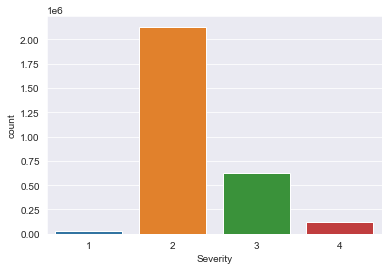

In [16]:
# Severity barplot
sns.countplot(data.Severity)

we observer high percentage of accident with Severity 2 which account for 73% 

#### 2. Start Time 

In [17]:
# Start Time Format
type(data.Start_Time)

pandas.core.series.Series

In [18]:
# Parse Start Date
data.Start_Time = pd.to_datetime(data.Start_Time)

In [19]:
# TimeZone format
data.Timezone.value_counts()

US/Eastern     1216626
US/Pacific      888512
US/Central      631219
US/Mountain     166823
Name: Timezone, dtype: int64

In [20]:
# Accident time of day
data.Start_Time.dt.hour.value_counts().sort_values(ascending=False)/len(data)*100

8     7.573462
7     7.400924
17    7.110276
16    6.958966
15    6.101059
18    5.706097
14    5.329576
13    5.027369
6     5.020385
9     4.913009
12    4.542164
11    4.448309
10    4.424157
19    4.032464
20    3.112939
5     2.847991
21    2.580257
22    2.400907
4     2.072758
23    1.968204
0     1.831756
1     1.710171
2     1.563436
3     1.323363
Name: Start_Time, dtype: float64

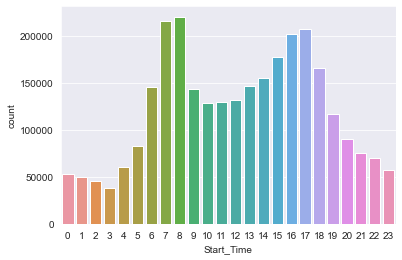

In [21]:
# Count Plot Start time hour
sns.countplot(data.Start_Time.dt.hour)

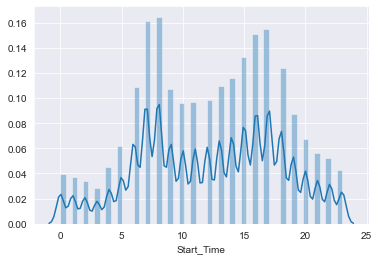

In [22]:
# Distribution of Start time hour
sns.distplot(data.Start_Time.dt.hour,hist=True)

 Top 5 Hours for accidents are Morning 7-8 AM And Again 3-5 PM

In [23]:
# Accident Week of day
data.Start_Time.dt.weekday.value_counts()

2    507292
4    506750
3    505811
1    504308
0    475111
5    215791
6    191547
Name: Start_Time, dtype: int64

In [24]:
# Accident Week of day %
data.Start_Time.dt.weekday.value_counts()/len(data)*100 

2    17.453047
4    17.434400
3    17.402094
1    17.350384
0    16.345881
5     7.424147
6     6.590048
Name: Start_Time, dtype: float64

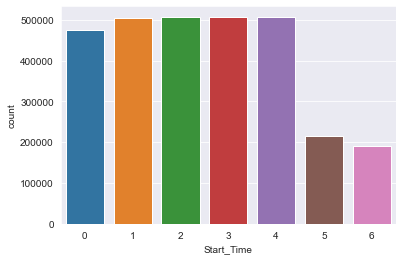

In [25]:
# Bar chart Week of day
sns.countplot(data.Start_Time.dt.weekday)

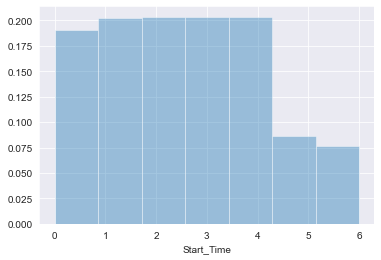

In [26]:
# distribution chart Week of day
sns.distplot(data.Start_Time.dt.weekday,bins=7,norm_hist=True,kde=False)

High number of accident on weekdays. Monday still number is slightly low compartively to other weekday

#### 3. Start Lat & Start Lng

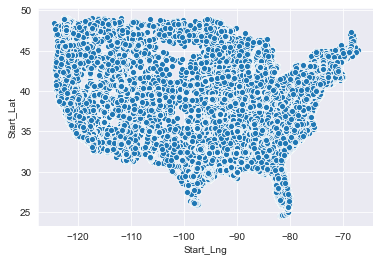

In [27]:
sns.scatterplot(x=data.Start_Lng,
               y= data.Start_Lat)

#### 4. Distance(mi)

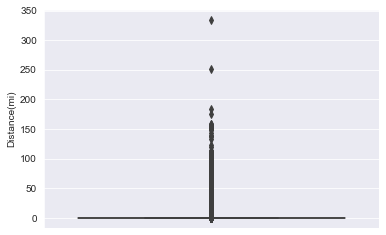

In [28]:
## distribution of distance 
sns.boxplot(y='Distance(mi)',data=data)

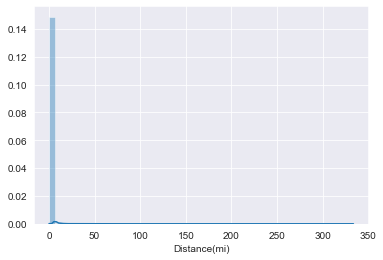

In [29]:
sns.distplot(data['Distance(mi)'],hist=True)

Major accident are point accidents

In [30]:
## distinace distribution after removing point accidents ceil the distance value

data[data['Distance(mi)'] != 0]["Distance(mi)"].apply(np.ceil).value_counts()

1.0      1066531
2.0       142737
3.0        54228
4.0        26085
5.0        14563
          ...   
101.0          1
104.0          1
55.0           1
158.0          1
159.0          1
Name: Distance(mi), Length: 122, dtype: int64

In [31]:
# distance distribution % after removing point accidents ceil the distance value
data[data['Distance(mi)'] != 0]["Distance(mi)"].apply(np.ceil).value_counts()/len(data[data['Distance(mi)'] != 0])*100

1.0      79.630017
2.0      10.657121
3.0       4.048805
4.0       1.947575
5.0       1.087312
           ...    
101.0     0.000075
104.0     0.000075
55.0      0.000075
158.0     0.000075
159.0     0.000075
Name: Distance(mi), Length: 122, dtype: float64

79% of accident effect road within 1 mile

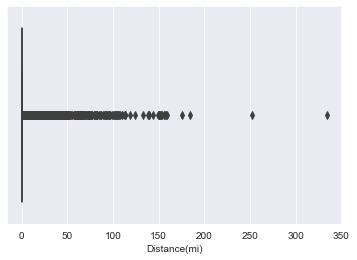

In [32]:
# box plot distance distribution  after removing point accidents ceil the distance value
sns.boxplot(data[data['Distance(mi)'] != 0]["Distance(mi)"].apply(np.ceil))

### Description

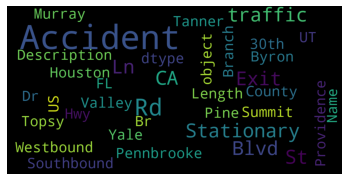

In [33]:
plt.imshow(wdc(background_color="black",
               max_font_size=40,
               scale=3,
               random_state=1,
               max_words=200).generate(str(data['Description'])))
plt.axis("off")
plt.show()


#### City

In [34]:
# unique City
data.City.unique()

array(['Greenville', 'Charlotte', 'Los Gatos', ..., 'Allons', 'Adolphus',
       'Gowanda'], dtype=object)

In [35]:
# Total city count 
len(data.City.unique())

11790

In [36]:
# Cities Count
data.City.value_counts()

Los Angeles        68411
Houston            68265
Charlotte          56176
Miami              49965
Dallas             48525
                   ...  
Kountze                1
Prairie Village        1
Gregory                1
Swifton                1
Belle Rose             1
Name: City, Length: 11789, dtype: int64

In [37]:
# Top 20 cities 
data.City.value_counts()[:20]

Los Angeles      68411
Houston          68265
Charlotte        56176
Miami            49965
Dallas           48525
Austin           38808
Raleigh          31355
Atlanta          29244
Sacramento       28984
Orlando          28092
Nashville        25277
Baton Rouge      25080
Minneapolis      22469
San Diego        22329
Phoenix          21370
Oklahoma City    21292
Portland         19432
Richmond         18343
Seattle          17384
Saint Paul       17266
Name: City, dtype: int64

In [38]:
# Top 20 cities % distribution
data.City.value_counts()[:20]/len(data) *100

Los Angeles      2.353635
Houston          2.348612
Charlotte        1.932698
Miami            1.719013
Dallas           1.669471
Austin           1.335164
Raleigh          1.078748
Atlanta          1.006121
Sacramento       0.997175
Orlando          0.966487
Nashville        0.869639
Baton Rouge      0.862861
Minneapolis      0.773031
San Diego        0.768215
Phoenix          0.735221
Oklahoma City    0.732537
Portland         0.668545
Richmond         0.631079
Seattle          0.598085
Saint Paul       0.594025
Name: City, dtype: float64

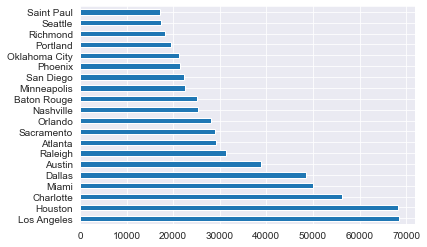

In [39]:
# Top 20 cities bar chart
data.City.value_counts()[:20].plot(kind="barh")

Houston & Los Angeles has high accident

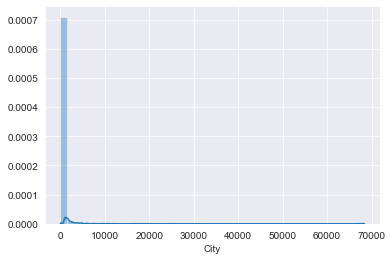

In [40]:
#Cities distribution 
sns.distplot(data.City.value_counts())

In [41]:
high_accident_city =data.City.value_counts()[data.City.value_counts() >=1000]
low_accident_city =data.City.value_counts()[data.City.value_counts() <1000]

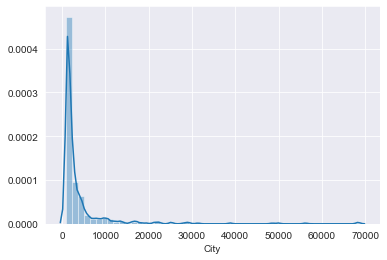

In [42]:
sns.distplot(high_accident_city)

In [43]:
len(high_accident_city)/len(data.City.unique())*100

4.351145038167939

Approx 4 percentage fall in high accident bracket with number >= 1000 (we have not looked into population size)

In [44]:
len(low_accident_city)/len(data.City.unique())*100

95.64037319762511

#### Temperature

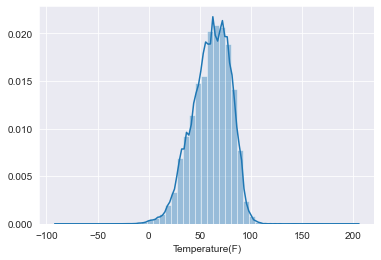

In [45]:
sns.distplot(data['Temperature(F)'],hist=True) 

In [46]:
# Temperature  mean() 
data['Temperature(F)'].mean()



60.988729711281614

In [47]:
# Temperature  mean() 
data['Temperature(F)'].median()

63.0

60.98 F mean Temperature & 63.0 F median Temperature 

#### Visibility

In [48]:
data['Visibility(mi)'].value_counts()/len(data)*100

10.0     77.765060
7.0       3.012650
9.0       2.589615
8.0       2.067357
5.0       1.948868
           ...    
3.2       0.000034
19.0      0.000034
54.0      0.000034
101.0     0.000034
130.0     0.000034
Name: Visibility(mi), Length: 81, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


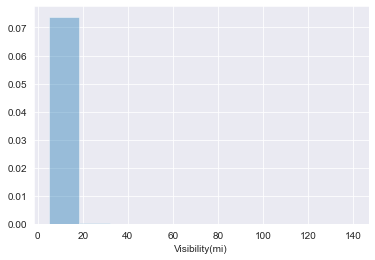

In [49]:
sns.distplot(data[data['Visibility(mi)'] >=5 ]['Visibility(mi)'],hist=True,kde=True,bins=10)

In [50]:
#Top 10 visibility(mi) range cause for accident
data['Visibility(mi)'].value_counts().sort_values(ascending=False).head(10)/len(data)*100

10.0    77.765060
7.0      3.012650
9.0      2.589615
8.0      2.067357
5.0      1.948868
6.0      1.758956
4.0      1.575478
3.0      1.529514
2.0      1.383227
1.0      1.004985
Name: Visibility(mi), dtype: float64

#### Bumps

In [51]:
# Percentage if there are any speed bump or not
data.Bump.value_counts()/len(data)*100

False    99.98008
True      0.01992
Name: Bump, dtype: float64

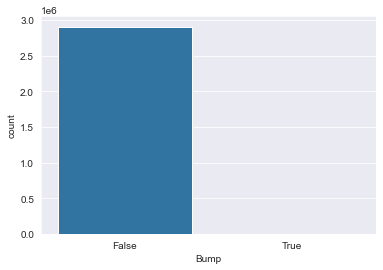

In [52]:
# Bar chart Speed Bump
sns.countplot(data.Bump)

### Crossing

In [53]:
# Percentage if there are any speed Crossing or not
data.Crossing.value_counts()/len(data)*100


False    92.467892
True      7.532108
Name: Crossing, dtype: float64

### GiveWay

In [54]:
data.Give_Way.value_counts()/len(data)*100

False    99.717196
True      0.282804
Name: Give_Way, dtype: float64

#### Task  : Ask Question 

1. Are there more accidents in warmer or cold area
2. which states has higher no of accidents ? Accident per capita
3. Among the top 100 cities inthe number of accident,which states do they belong to most frequently
4. What time of the day are accidents most frequent in?
5. Which days of the week have the most accidents?
6. Which months have the most accidents?
7. What is the trend of accidents year over year (decreasing/increasing?)
8. When is accidents per unit of traffic the highest.

#### Task  :  Summaries your inference

Insight 
1. Less than 5% cities have more than 1000 yearly accident
2. Over 1200 cities report 1 accident
3. the no of accident decreases exponcially 
4. High Percentage of accident between 7-8 am (Probably People are in hurry Or taffic is higher)
5. High Percentage of accident between 3P-5pm

#### Task  : Document, Publish and Present